
This is an example digital architecture based on Eyeriss by Yu-Hsin Chen, Tushar
Krishna, Joel Emer, and Vivienne Sze.

Some of the important variables for nestquant:

- *TECHNOLOGY*: 65 nm
- *SUPPORTED_INPUT_BITS*: 8 bit(s)
- *SUPPORTED_OUTPUT_BITS*: 16 bit(s)
- *SUPPORTED_WEIGHT_BITS*: 8 bit(s)
- *GLOBAL_CYCLE_SECONDS*: 1e-09 clock period

Components are defined the following places:
- workspace/models/arch/1_macro/example_traditional/example_components/components.csv
- workspace/models/arch/1_macro/example_traditional/components.yaml
- The top-level components locations
  - workspace/models/components/components/*.yaml
  - workspace/models/components/components/accelergy_plug_ins/*.py
  
Place new components in any of these places!



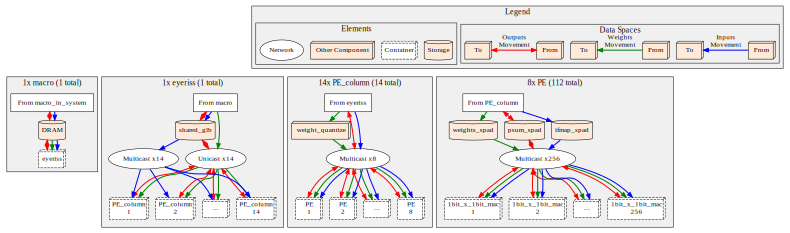

In [5]:
from _tests import scripts
from scripts.notebook_utils import *

display_markdown(
    f"""
This is an example digital architecture based on Eyeriss by Yu-Hsin Chen, Tushar
Krishna, Joel Emer, and Vivienne Sze.

{get_important_variables_markdown('nestquant')}

Components are defined the following places:
- workspace/models/arch/1_macro/example_traditional/example_components/components.csv
- workspace/models/arch/1_macro/example_traditional/components.yaml
- The top-level components locations
  - workspace/models/components/components/*.yaml
  - workspace/models/components/components/accelergy_plug_ins/*.py
  
Place new components in any of these places!

"""
)
display_diagram(get_diagram("nestquant", ignore=DIAGRAM_DEFAULT_IGNORE))


   ### Area and energy breakdown
   This example architecture doesn't have a suite of tests, but you may
   look at the other example architectures for inspiration.        
   

Running on layer /home/workspace/models/workloads/llm/gemv.yaml


100%|██████████| 2/2 [00:24<00:00, 12.14s/it]


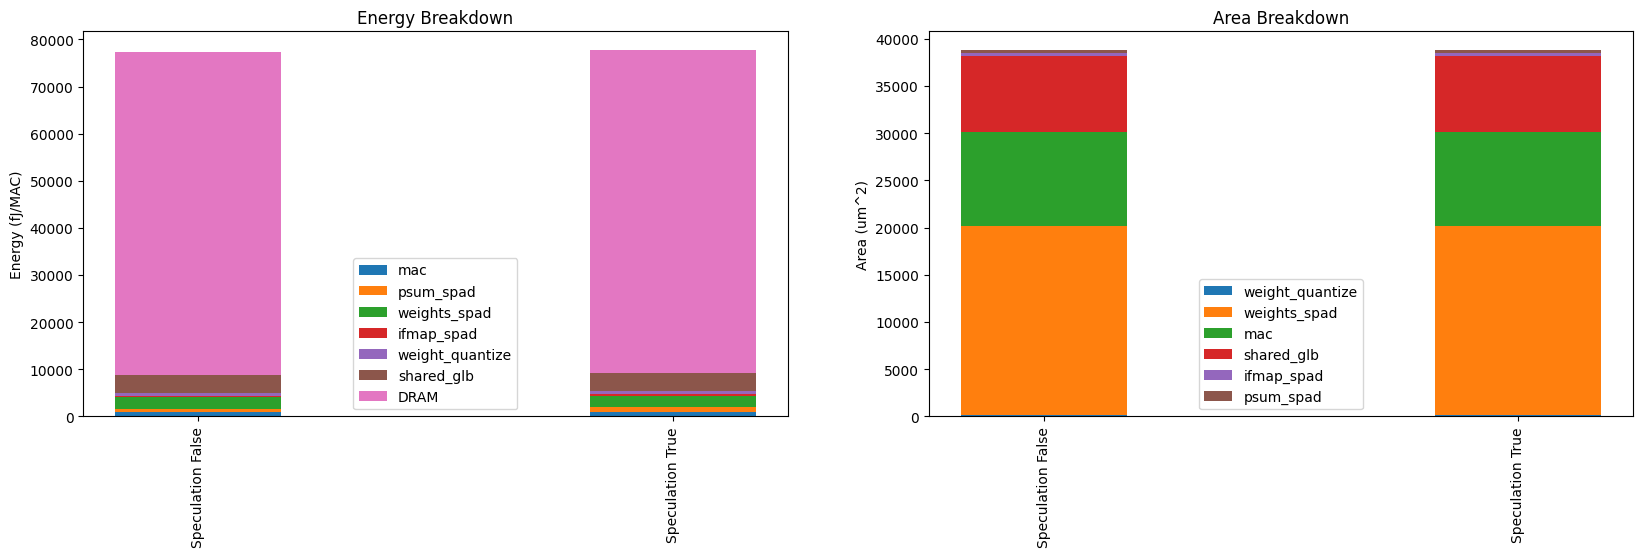

In [6]:
result = run_test("nestquant", "test_area_energy_breakdown")
fig, axs = plt.subplots(1, 2, figsize=(20, 5))
bar_stacked(
    {f"Speculation {r.variables['QUANTIZE']}": r.per_compute('per_component_energy')*1e15 for r in result},
    ylabel="Energy (fJ/MAC)",
    title=f"Energy Breakdown",
    ax=axs[0]
)
bar_stacked(
    {f"Speculation {r.variables['QUANTIZE']}": r.per_compute('per_component_area')*1e12 for r in result},
    ylabel="Area (um^2)",
    title=f"Area Breakdown",
    ax=axs[1]
)

In [12]:
result[0].per_compute('per_component_energy')

{'mac': 9.994239999999999e-13,
 'psum_spad': 8.86784e-13,
 'weights_spad': 2.4985600000000002e-12,
 'ifmap_spad': 6.574080000000001e-13,
 'output_quantize': 8.335359999999999e-13,
 'shared_glb': 5.7344e-12,
 'DRAM': 1.18784e-10}